In [6]:
# Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Reading in Data
df = pd.read_csv(r'/Users/smjzaidi/Downloads/movies.csv.zip')


In [8]:
# Checking for missing data

for col in df.columns:
    pct_miss = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_miss))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
# Dropping missing data 

df = df.dropna()

In [12]:
for col in df.columns:
    pct_miss = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_miss))


name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [14]:
# Data Types

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
# Changing data types for certain columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [114]:
# Correcting the year column to match with the year in released

df['year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [42]:
df = df.sort_values(by = ['gross'], inplace=False, ascending=False)

In [54]:
pd.set_option('display.max_rows', None)

In [130]:
# Checking for any duplicates

dup = df['company'].drop_duplicates().sort_values(ascending=False)
dup.head()

7129        thefyzz
5664    micro_scope
4007       i5 Films
6793     i am OTHER
6420           erbp
Name: company, dtype: object

In [ ]:
# Hypothesizing High Correlation with Gross
# Budget 
# Company
# Votes
# Score

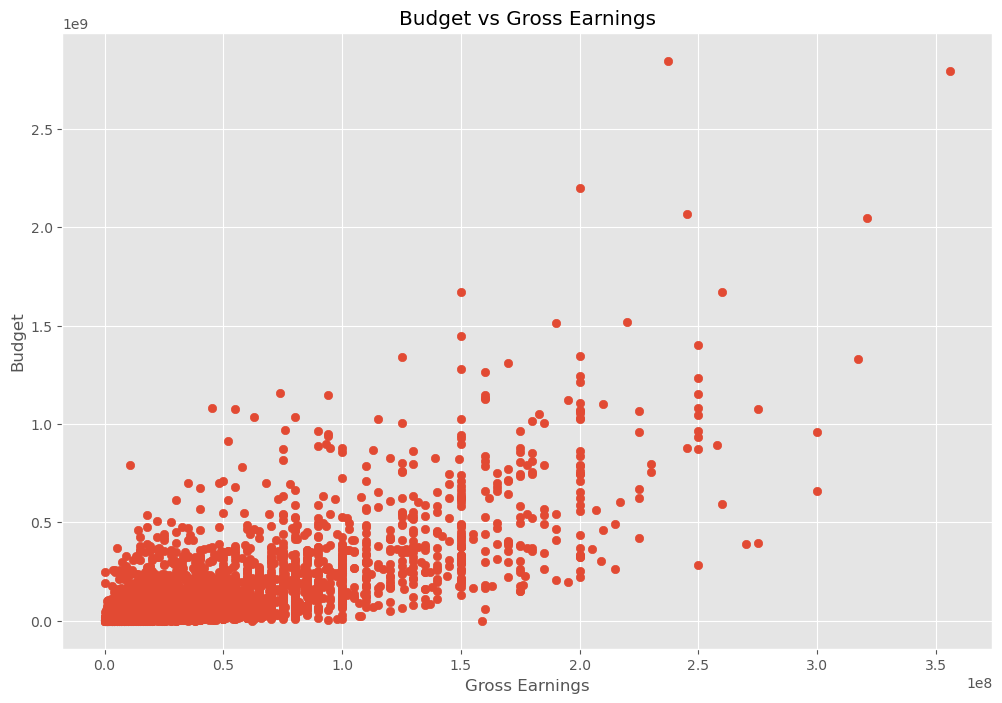

In [56]:
# Scatter Plot: Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title ('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')

plt.show()

In [46]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


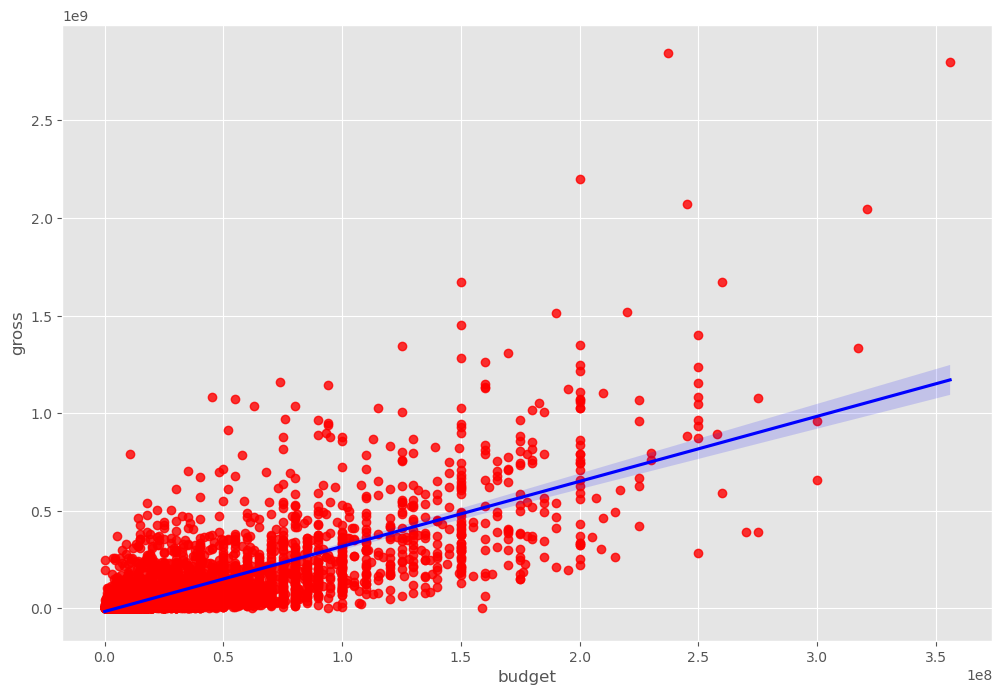

In [74]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})
plt.show()

In [ ]:
# Correlation 

In [96]:
df.corr(numeric_only=True) 

,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


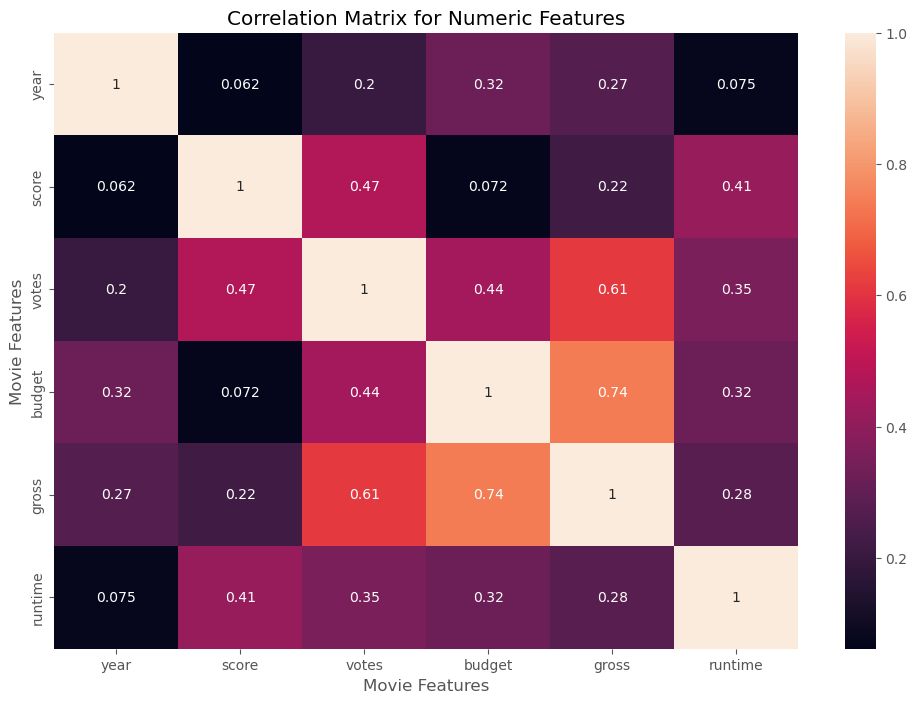

In [116]:
# Visualising the Correlation Matrix

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot = True)

plt.title ('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [122]:
sorted_pairs = corr_matrix.unstack().sort_values()

In [126]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross    votes      0.614751
votes    gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64